In [104]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import random
import json
import requests
# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [105]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
mylats =  []
mylngs =  []
# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        mylats.append(lat_lng[0])
        mylngs.append(lat_lng[1])
        
# Print the city count to confirm sufficient count

c_df = pd.DataFrame({'City':cities,'lats':mylats,'lngs':mylngs}, dtype='int64')
c_df.reset_index(inplace=True)
print(len(c_df.City))

617


## Perform API Calls

In [106]:
# Dependencies
import requests
import time
import urllib.parse
import json
from addict import Dict
import numpy
import pandas as pd
from collections import OrderedDict
from datetime import date
lats= []
lons=[]
lats.append(c_df['lats'])
lons.append(c_df['lngs'])
api_key = api_keys.api_key
index = []

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial"+api_key
apis = []
jsons = []
x=0
# mycols = ['temp', 'pressure','humidity','temp_min','temp_max','clouds','ws','wd']
# c_df.append(mycols)
# y=(x+1)
rows = []
response_json1 = []
text_file = open("Output.txt", "w")

for x in range(len(cities)): #CHANGE BACK TO range(len(cities))
    rurl = (url+ f'&lat={mylats[x]}&lon={mylngs[x]}')
    post_response = requests.get(rurl)
    response_json1.append(post_response.json())
    text_file.write(f'Processing city number {[x+1]},at longitude{mylngs[x]},latitude{mylats[x]}') 
text_file.close()


Processing city number [1],at longitude120.31644379425143,latitude41.83220036013711
Processing city number [2],at longitude92.33607938976485,latitude70.72861108865766
Processing city number [3],at longitude-13.804650904189657,latitude65.9307102271035
Processing city number [4],at longitude-174.15419389033653,latitude21.444289549565482
Processing city number [5],at longitude-167.37922827165858,latitude75.8952451817268
Processing city number [6],at longitude-168.1951042753298,latitude-70.13498624742728
Processing city number [7],at longitude61.738698448701285,latitude7.7963280137986
Processing city number [8],at longitude14.966771452516781,latitude48.894273835830035
Processing city number [9],at longitude-153.24608204640873,latitude-48.3170386189999
Processing city number [10],at longitude-26.83282632524734,latitude-43.70863453446586
Processing city number [11],at longitude50.1323606905336,latitude-6.466023078202525
Processing city number [12],at longitude-99.857582319614,latitude38.5942

Processing city number [98],at longitude34.2118853988286,latitude63.068320716170405
Processing city number [99],at longitude8.301155845974819,latitude-0.8551690743091598
Processing city number [100],at longitude-112.43044333820953,latitude7.744912699583068
Processing city number [101],at longitude-0.8732964531523635,latitude16.303763927102864
Processing city number [102],at longitude68.9818810466052,latitude-1.2879312294378593
Processing city number [103],at longitude134.96707410707563,latitude81.11788956765872
Processing city number [104],at longitude-10.729531472281877,latitude41.897203850161134
Processing city number [105],at longitude39.20107932366585,latitude32.17375040381728
Processing city number [106],at longitude78.63353361962697,latitude46.56428214593004
Processing city number [107],at longitude179.51974154423516,latitude-15.570374642095118
Processing city number [108],at longitude140.48846251453205,latitude-5.505714974597794
Processing city number [109],at longitude12.000105

Processing city number [193],at longitude142.86577433722573,latitude79.08615851702848
Processing city number [194],at longitude-62.68653189247841,latitude72.28735310957572
Processing city number [195],at longitude-94.63487880710707,latitude40.10260964770646
Processing city number [196],at longitude-38.82148543135253,latitude-20.658430366099665
Processing city number [197],at longitude88.66168547868466,latitude44.838131113383156
Processing city number [198],at longitude-91.9935746282771,latitude38.85947999891124
Processing city number [199],at longitude63.470443678904275,latitude83.2205211716958
Processing city number [200],at longitude99.0651528117537,latitude34.26792507744682
Processing city number [201],at longitude90.48718415940579,latitude13.292816193498993
Processing city number [202],at longitude-42.80795248992112,latitude80.08509159821648
Processing city number [203],at longitude-145.88594275759357,latitude56.87371253018259
Processing city number [204],at longitude64.34304782089

Processing city number [288],at longitude-86.31344464712575,latitude-4.61136411724361
Processing city number [289],at longitude119.62952404261318,latitude52.49148477417231
Processing city number [290],at longitude-52.96460688238301,latitude65.28834285496512
Processing city number [291],at longitude84.99416738086757,latitude64.7974161292615
Processing city number [292],at longitude23.21472051868676,latitude41.64842243991217
Processing city number [293],at longitude121.29011207798953,latitude41.39067448923302
Processing city number [294],at longitude173.466649198867,latitude63.4006569641688
Processing city number [295],at longitude-48.6595877600179,latitude19.0485104010409
Processing city number [296],at longitude-67.02429996506024,latitude-12.37537540968367
Processing city number [297],at longitude-61.47481886968595,latitude18.460635485641504
Processing city number [298],at longitude55.398331861345184,latitude-16.579926283455563
Processing city number [299],at longitude129.2868387030128

Processing city number [383],at longitude-63.57847605776114,latitude88.22932073597758
Processing city number [384],at longitude-45.370982473213616,latitude84.31252472414707
Processing city number [385],at longitude-87.23484931832773,latitude28.594982330663044
Processing city number [386],at longitude25.246735968509455,latitude6.419542623633234
Processing city number [387],at longitude76.40331697634093,latitude49.90576452246094
Processing city number [388],at longitude38.29892313262624,latitude51.70499215526152
Processing city number [389],at longitude-79.59612335687002,latitude-1.974353488431504
Processing city number [390],at longitude159.90498241283626,latitude43.747798566294506
Processing city number [391],at longitude-100.65913552861726,latitude-26.32341876131185
Processing city number [392],at longitude-31.101564300293717,latitude-4.887284318188392
Processing city number [393],at longitude-126.62445216458954,latitude16.197868342775337
Processing city number [394],at longitude-150.

Processing city number [478],at longitude71.79816668346609,latitude63.16067930262227
Processing city number [479],at longitude99.51883630120534,latitude57.46003684527196
Processing city number [480],at longitude69.4645441093981,latitude17.69851939926008
Processing city number [481],at longitude-5.242900021480153,latitude50.59814866938845
Processing city number [482],at longitude178.54718127798714,latitude-32.94694734844132
Processing city number [483],at longitude-109.54219498218956,latitude0.2935013129356179
Processing city number [484],at longitude26.293002051862317,latitude6.550666481184052
Processing city number [485],at longitude143.22887805285956,latitude-32.62576424983362
Processing city number [486],at longitude157.79448860968353,latitude53.213905833161334
Processing city number [487],at longitude41.53527770296216,latitude46.48153016524205
Processing city number [488],at longitude105.11998758858005,latitude52.379809766328606
Processing city number [489],at longitude-98.40162603

Processing city number [574],at longitude-97.8761513573508,latitude41.568860979246466
Processing city number [575],at longitude-1.0591260981028086,latitude-39.402740596124325
Processing city number [576],at longitude98.76106080129233,latitude66.92049854119301
Processing city number [577],at longitude20.333025964079837,latitude50.05669618939092
Processing city number [578],at longitude3.1819607792674844,latitude63.881084688676964
Processing city number [579],at longitude131.06406474360546,latitude25.9662464361204
Processing city number [580],at longitude139.42047612733245,latitude1.6763553967895035
Processing city number [581],at longitude129.51793830145732,latitude41.96515479662369
Processing city number [582],at longitude-134.3300919342205,latitude29.747700938430654
Processing city number [583],at longitude71.39994185948677,latitude14.35681721392406
Processing city number [584],at longitude128.7161330186209,latitude30.788851457253884
Processing city number [585],at longitude-109.85419

In [194]:
tlist = []
plist = []
hlist = []
tminlist = []
tmaxlist = []
clist = []
wslist = []
wdlist = []
datalist = []
k=0
d=0
for d in range(0,6):
    dlist=[]
    datalist.append(dlist)
    for k in range(0,100):
        t = response_json1[k]['main']['temp']
        p = response_json1[k]['main']['pressure']
        h = response_json1[k]['main']['humidity']
        tmin = response_json1[k]['main']['temp_min']
        tmax = response_json1[k]['main']['temp_max']
        c = response_json1[k]['clouds']['all']
        wd = response_json1[k]['wind']['speed']
        ws = response_json1[k]['wind']['deg']
        d1= ({'temp':t, 'pressure':p ,'humidity':h,'temp_min':tmin,'temp_max':tmax,'clouds':c,'ws':ws,'wd':wd})
        dlist.append(d1) 

datalists = datalist[0]+ datalist[1] + datalist[2] + datalist[3] + datalist[4] + datalist[5]

In [195]:
df1 = pd.DataFrame(datalists)
ddf = c_df[:600]
xdf = pd.concat([df1,ddf], axis=1)
xdf.head()
xdf.tail()

,clouds,humidity,pressure,temp,temp_max,temp_min,wd,ws,index,City,lats,lngs
595,64,100,1025.32,76.29,76.29,76.29,12.15,170.5000,595,mwense,-10,28
596,0,100,1032.05,59.24,59.24,59.24,16.51,304.0000,596,asuncion,-24,-58
597,88,100,991.92,37.14,37.14,37.14,3.65,89.0002,597,dali,26,100
598,75,83,1012.00,80.60,80.60,80.60,10.29,200.0000,598,inuvik,65,-132
599,64,100,1025.07,79.17,79.17,79.17,11.48,172.5000,599,mae sai,21,99


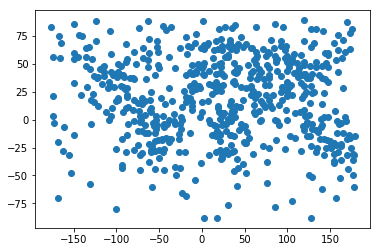

In [207]:
y = xdf['lats']
plt.scatter(xdf['lngs'],y)

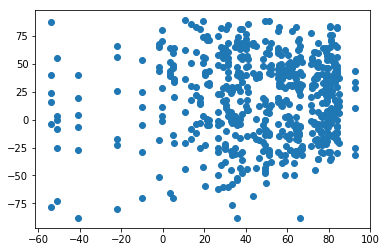

In [208]:
plt.scatter(xdf['temp'],y)

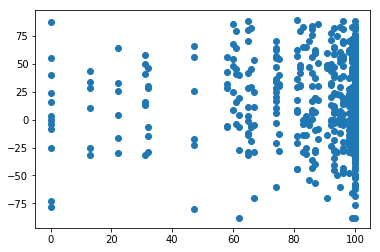

In [221]:
plt.scatter(xdf['humidity'],y)

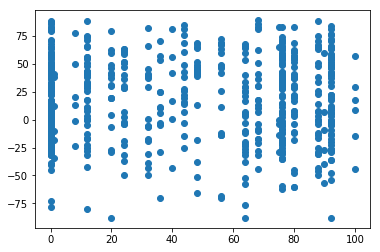

In [210]:
plt.scatter(xdf['clouds'],y)

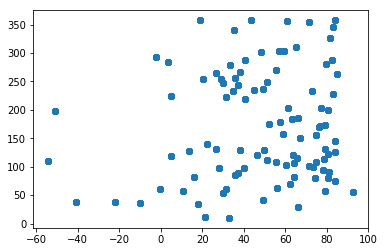

In [218]:
plt.scatter(xdf['temp'],xdf['ws'])